In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/sample_data/Tempat-Wisata-Toba-Preprocessing.csv"
df = pd.read_csv(file_path)

In [8]:
# Menghapus kolom yang tidak diperlukan
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Menangani missing values pada kolom 'Reviews' dengan mengisi dengan string 'No Review'
df['Reviews'].fillna('No Review', inplace=True)

# Mengisi missing values pada kolom 'ReviewerId' dan 'Rating' dengan nilai rata-rata
df['ReviewerId'].fillna(df['ReviewerId'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Menghapus duplikat jika ada
df.drop_duplicates(inplace=True)

# Melakukan encoding untuk kolom 'Category' dan 'Nama_tempat_wisata'
df['Category'] = df['Category'].astype('category').cat.codes
df['Nama_tempat_wisata'] = df['Nama_tempat_wisata'].astype('category').cat.codes

# Menampilkan informasi dataset setelah preprocessing
print(df.info())

# Menampilkan 5 baris pertama dari dataset yang sudah diproses
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 43053 entries, 0 to 43225
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             43053 non-null  object 
 1   PlaceID             43053 non-null  int64  
 2   Nama_tempat_wisata  43053 non-null  int8   
 3   Category            43053 non-null  int8   
 4   ReviewerId          43053 non-null  float64
 5   Rating              43053 non-null  float64
 6   Reviews             43053 non-null  object 
dtypes: float64(2), int64(1), int8(2), object(2)
memory usage: 2.1+ MB
None
                                             address  PlaceID  \
0  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
1  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
2  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
3  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
4  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...   

<ipython-input-8-e7006b2d49ab>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reviews'].fillna('No Review', inplace=True)
<ipython-input-8-e7006b2d49ab>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [9]:
# Split data into train (70%), validation (15%), and test (15%)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")


Train size: 30137, Validation size: 6458, Test size: 6458


In [10]:
# Membuat item profile (contoh sederhana menggunakan kategori dan nama tempat wisata)
# Menggunakan rata-rata rating untuk setiap item (tempat wisata)
item_profiles = df.groupby('Nama_tempat_wisata').agg({'Rating': 'mean', 'Category': 'mean'}).reset_index()

# Membuat user profile (berdasarkan rata-rata rating pengguna)
# Untuk setiap pengguna, ambil rata-rata rating yang diberikan pada semua tempat wisata
user_profiles = df.groupby('ReviewerId').agg({'Rating': 'mean'}).reset_index()

# Menampilkan 5 baris pertama dari item_profiles dan user_profiles setelah preprocessing
print("Item Profiles:")
print(item_profiles.head())

print("\nUser Profiles:")
print(user_profiles.head())


Item Profiles:
   Nama_tempat_wisata    Rating  Category
0                   0  4.332571       1.0
1                   1  4.361607       6.0
2                   2  4.487521       0.0
3                   3  4.538682       0.0
4                   4  4.360000       0.0

User Profiles:
     ReviewerId  Rating
0  1.000010e+20     4.0
1  1.000020e+20     5.0
2  1.000030e+20     4.5
3  1.000040e+20     5.0
4  1.000050e+20     4.0


In [11]:
# Menentukan user_id dan item_id yang benar dari dataset
user_col = 'ReviewerId'  # Pastikan menggunakan ReviewerId yang ada pada dataset
item_col = 'Nama_tempat_wisata'  # Pastikan menggunakan Nama_tempat_wisata sebagai item_id

# Membuat matriks pengguna-item (User-Item Matrix)
user_item_matrix = df.pivot_table(index=user_col, columns=item_col, values='Rating', aggfunc='mean')

# Menangani missing values, bisa menggunakan imputation atau drop
user_item_matrix = user_item_matrix.fillna(user_item_matrix.mean())

# Menampilkan matriks pengguna-item setelah preprocessing
print("User-Item Matrix:")
print(user_item_matrix.head())

# Menyiapkan data untuk Collaborative Filtering dengan CNN
# Melakukan reshaping untuk keperluan input CNN (conv2d memerlukan 2D array)
X = user_item_matrix.values
X = np.expand_dims(X, axis=-1)  # Menambahkan dimensi untuk input CNN


User-Item Matrix:
Nama_tempat_wisata       0         1         2         3     4         5    \
ReviewerId                                                                   
1.000010e+20        4.326219  4.365471  4.491817  4.543258  4.36  4.833333   
1.000020e+20        4.326219  4.365471  4.491817  4.543258  4.36  4.833333   
1.000030e+20        4.326219  4.365471  4.491817  4.543258  4.36  4.833333   
1.000040e+20        4.326219  4.365471  4.491817  4.543258  4.36  4.833333   
1.000050e+20        4.326219  4.365471  4.491817  4.543258  4.36  4.833333   

Nama_tempat_wisata       6         7    8         9    ...       92   \
ReviewerId                                             ...             
1.000010e+20        4.757576  4.638952  4.5  4.133333  ...  4.597826   
1.000020e+20        4.757576  4.638952  4.5  4.133333  ...  4.597826   
1.000030e+20        4.757576  4.638952  4.5  4.133333  ...  4.597826   
1.000040e+20        4.757576  4.638952  4.5  4.133333  ...  4.597826   
1.0

In [20]:
# Membentuk matriks pengguna-item hanya dari data numerik
user_item_matrix = df.pivot_table(index='ReviewerId', columns='Nama_tempat_wisata', values='Rating', aggfunc='mean')

# Menangani missing values dengan mean (rata-rata) dari setiap kolom
user_item_matrix = user_item_matrix.fillna(user_item_matrix.mean())

# Konversi ke array numpy
X = user_item_matrix.values

# Memisahkan data menjadi train, validation, dan test
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Menambahkan dimensi untuk input CNN (channel terakhir adalah 1)
X_train_reshaped = np.expand_dims(np.expand_dims(X_train, axis=-1), axis=-1).astype('float32')
X_test_reshaped = np.expand_dims(np.expand_dims(X_test, axis=-1), axis=-1).astype('float32')

# Periksa bentuk data setelah direshaped
print(f"Shape of X_train_reshaped: {X_train_reshaped.shape}")
print(f"Shape of X_test_reshaped: {X_test_reshaped.shape}")

# Memastikan bahwa input shape sesuai dengan model
input_shape = X_train_reshaped.shape[1:]  # Hanya dimensi selain batch size
print(f"Input shape for CNN: {input_shape}")

# Membuat model CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=input_shape))  # Input dinamis sesuai data
model.add(Conv2D(32, (1, 1), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

# Melatih model
history = model.fit(
    X_train_reshaped, X_train_reshaped,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_reshaped, X_test_reshaped),
    verbose=1
)

# Simpan model
model.save('collaborative_filtering_cnn_model_fixed.h5')

# Evaluasi model
val_loss, val_mae = model.evaluate(X_test_reshaped, X_test_reshaped, verbose=0)
print(f'Validation Loss: {val_loss}')
print(f'Validation MAE: {val_mae}')


Shape of X_train_reshaped: (10508, 102, 1, 1)
Shape of X_test_reshaped: (4504, 102, 1, 1)
Input shape for CNN: (102, 1, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 102, 1, 32)          │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 102, 1, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 102, 1, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 102, 1, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6528)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         835,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,017 (3.20 MB)

 Trainable params: 838,017 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 8.5313 - mean_absolute_error: 1.9897 - val_loss: 1.0540 - val_mean_absolute_error: 1.0010
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 1.6579 - mean_absolute_error: 1.0263 - val_loss: 1.9042 - val_mean_absolute_error: 1.3606
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 1.5869 - mean_absolute_error: 0.9996 - val_loss: 1.4879 - val_mean_absolute_error: 1.1982
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.4701 - mean_absolute_error: 0.9668 - val_loss: 1.4095 - val_mean_absolute_error: 1.1651
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 1.3086 - mean_absolute_error: 0.9114 - val_loss: 1.3220 - val_mean_absolute_error: 1.1270
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 1.2387 - mean_absolute_error: 0.8876 - val_loss: 1.0036 - val_mean_absolute_error: 0.9755
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 1.1187 - mean_absolute_error: 0.

Validation Loss: 0.7338399887084961
Validation MAE: 0.8253255486488342


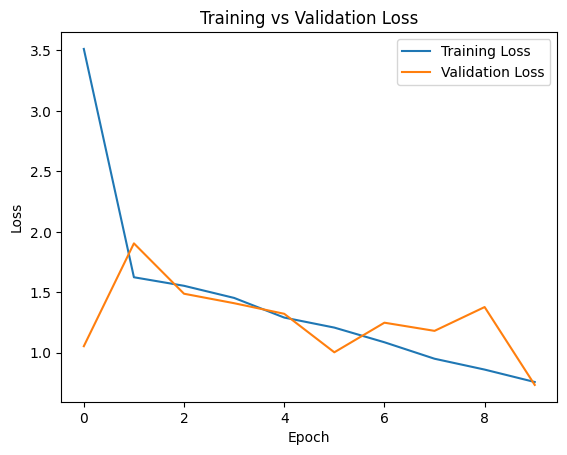

In [22]:
# Hasil dan Visualisasi

import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
